<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/unidade5_interpola%C3%A7%C3%A3oCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unidade 5: Aproximação de funções



Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a Interpolação e o Método dos Mínimos Quadrados. A seguir, apresentamos alguns exemplos de resolução em Python. Vamos utilizar as bibliotecas numpy e scipy.

**Interpolação Polinomial**

Considere $n+1$ pontos distintos $x_0,x_1,\ldots,y_n$ e $f(x_0),f(x_1),\ldots,f(x_n)$. Interpolar $f(x)$ consiste em obter uma função aproximadora $g(x)$ tal que $g(x_i) = f(x_i)$, para $i=0,1,\ldots,n.$








Vamos estudar três formas de se obter um polinômio interpolador:

1.  Resolvendo um sistema linear.
2.  Fórmula de Lagrange.
3.  Forma de Newton.

**Proposição:**

Dados $n+1$ pontos $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, com $x_0,x_1,\ldots,x_n$ distintos entre si, existe um único polinômio interpolador $p(x)$ de grau menor ou igual a $n$ que passa por esses pontos, ou seja, $p(x_i)=y_i$, para $i=0,1,\ldots,n$.

*demonstração:*

Seja $p(x)=a_0+a_1x+a_2x^2+\ldots+a_nx^n$ um polinômio de grau menor ou igual a $n$. Queremos determinar $a_0,a_1,\ldots,a_n$ de modo que: $p(x_i)=y_i$. Ou seja,
$$\begin{array}{ccccccccccccc}
p(x_0) & = & a_0 & + & a_1x_0 & + \ldots & + & a_nx_0 = y_0\\
p(x_1) & = & a_0 & + & a_1x_1 & + \ldots & + & a_nx_1 = y_1\\
\vdots \\
p(x_n) & = & a_0 & + & a_1x_n & + \ldots & + & a_nx_n = y_n\\
\end{array}$$

Na notação matricial,

$$\left(\begin{array}{ccccc}
1 & x_0 & x_0^2 & \ldots & x_0^n \\
1 & x_1 & x_1^2 & \ldots & x_1^n \\
\vdots \\
1 & x_n & x_n^2 & \ldots & x_n^n
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right)=\left(\begin{array}{c}
y_0\\
y_1\\
\vdots\\
y_n
\end{array}\right)$$

Para mostrar a existência e unicidade do polinômio interpolador precisamos mostrar que o sistema linear tenha única solução.

Vamos considerar $n=1$ então temos o sistema linear:
$$\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1
\end{array}\right)=\left(\begin{array}{c}
y_0\\
y_1
\end{array}\right)$$

Como $x_0\neq x_1$ a matriz possui linhas linearmente independentes  e portanto o determinante é diferente de zero. Logo, a matriz é inversível e o sistema linear possui única solução. De forma análoga, verificamos para o sistema $(n+1)\times (n+1)$, já que $x_0\neq x_1\neq \ldots\neq x_n$.

*Exemplo 1:*

Dada a tabela de valores da função $f(x)=e^x$. Aproxime (interpole) $f(x)$ em $x=1.32$.

$$\begin{array}{c|ccc}
x & 1.3 & 1.4 & 1.5 \\
\hline
f(x) & 3.669 & 4.055 & 4.482 \\
\end{array}$$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def polin(x, c):
    y = c[0]
    n = len(c)
    for i in range(1,n):
        y += c[i]*x**i
    return y

x = [1.3, 1.4, 1.5]
y = [3.669, 4.055, 4.482]
n = len(x)
A = np.zeros((n,n))

for j in range (n):
   for i in range (n):
      A[i][j] = x[i]**j

c = np.linalg.solve(A, y)

xi = 1.32
yi = polin(xi, c)

print(yi - np.exp(1.32))

Exemplo 2:

Dada a tabela de valores
$$\begin{array}{c|ccccccc}
x & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8\\
\hline
f(x) & 0.5 & 0.6 & 0.9 & 0.8 & 1.2 & 1.5 & 1.7 & 2\\
\end{array}$$

Obtenha o polinômio que interpola os dados da tabela.

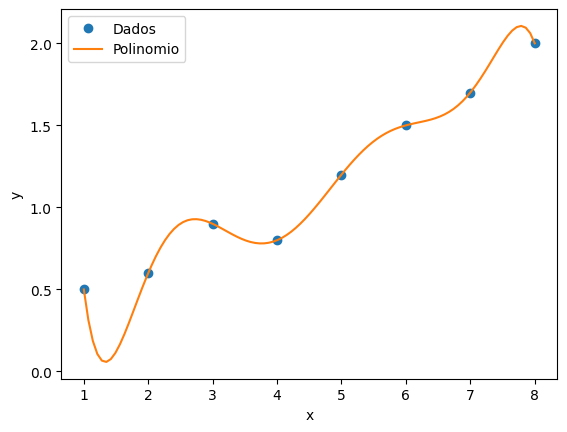

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def polin(x, c):
    y = c[0]
    n = len(c)
    for i in range(1,n):
        y += c[i]*x**i
    return y

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0.5, 0.6, 0.9, 0.8, 1.2, 1.5, 1.7, 2]
n = len(x)
A = np.zeros((n,n))

for j in range (n):
   for i in range (n):
      A[i][j] = x[i]**j

c = np.linalg.solve(A, y)

xx = np.linspace(1,8,101)
yy = polin(xx, c)

plt.figure(1)
plt.plot(x, y, 'o', label='Dados')
plt.plot(xx, yy, label='Polinomio')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()